Explained Variance Ratio for each Principal Component:
PC1: 0.3620
PC2: 0.1921
PC3: 0.1112


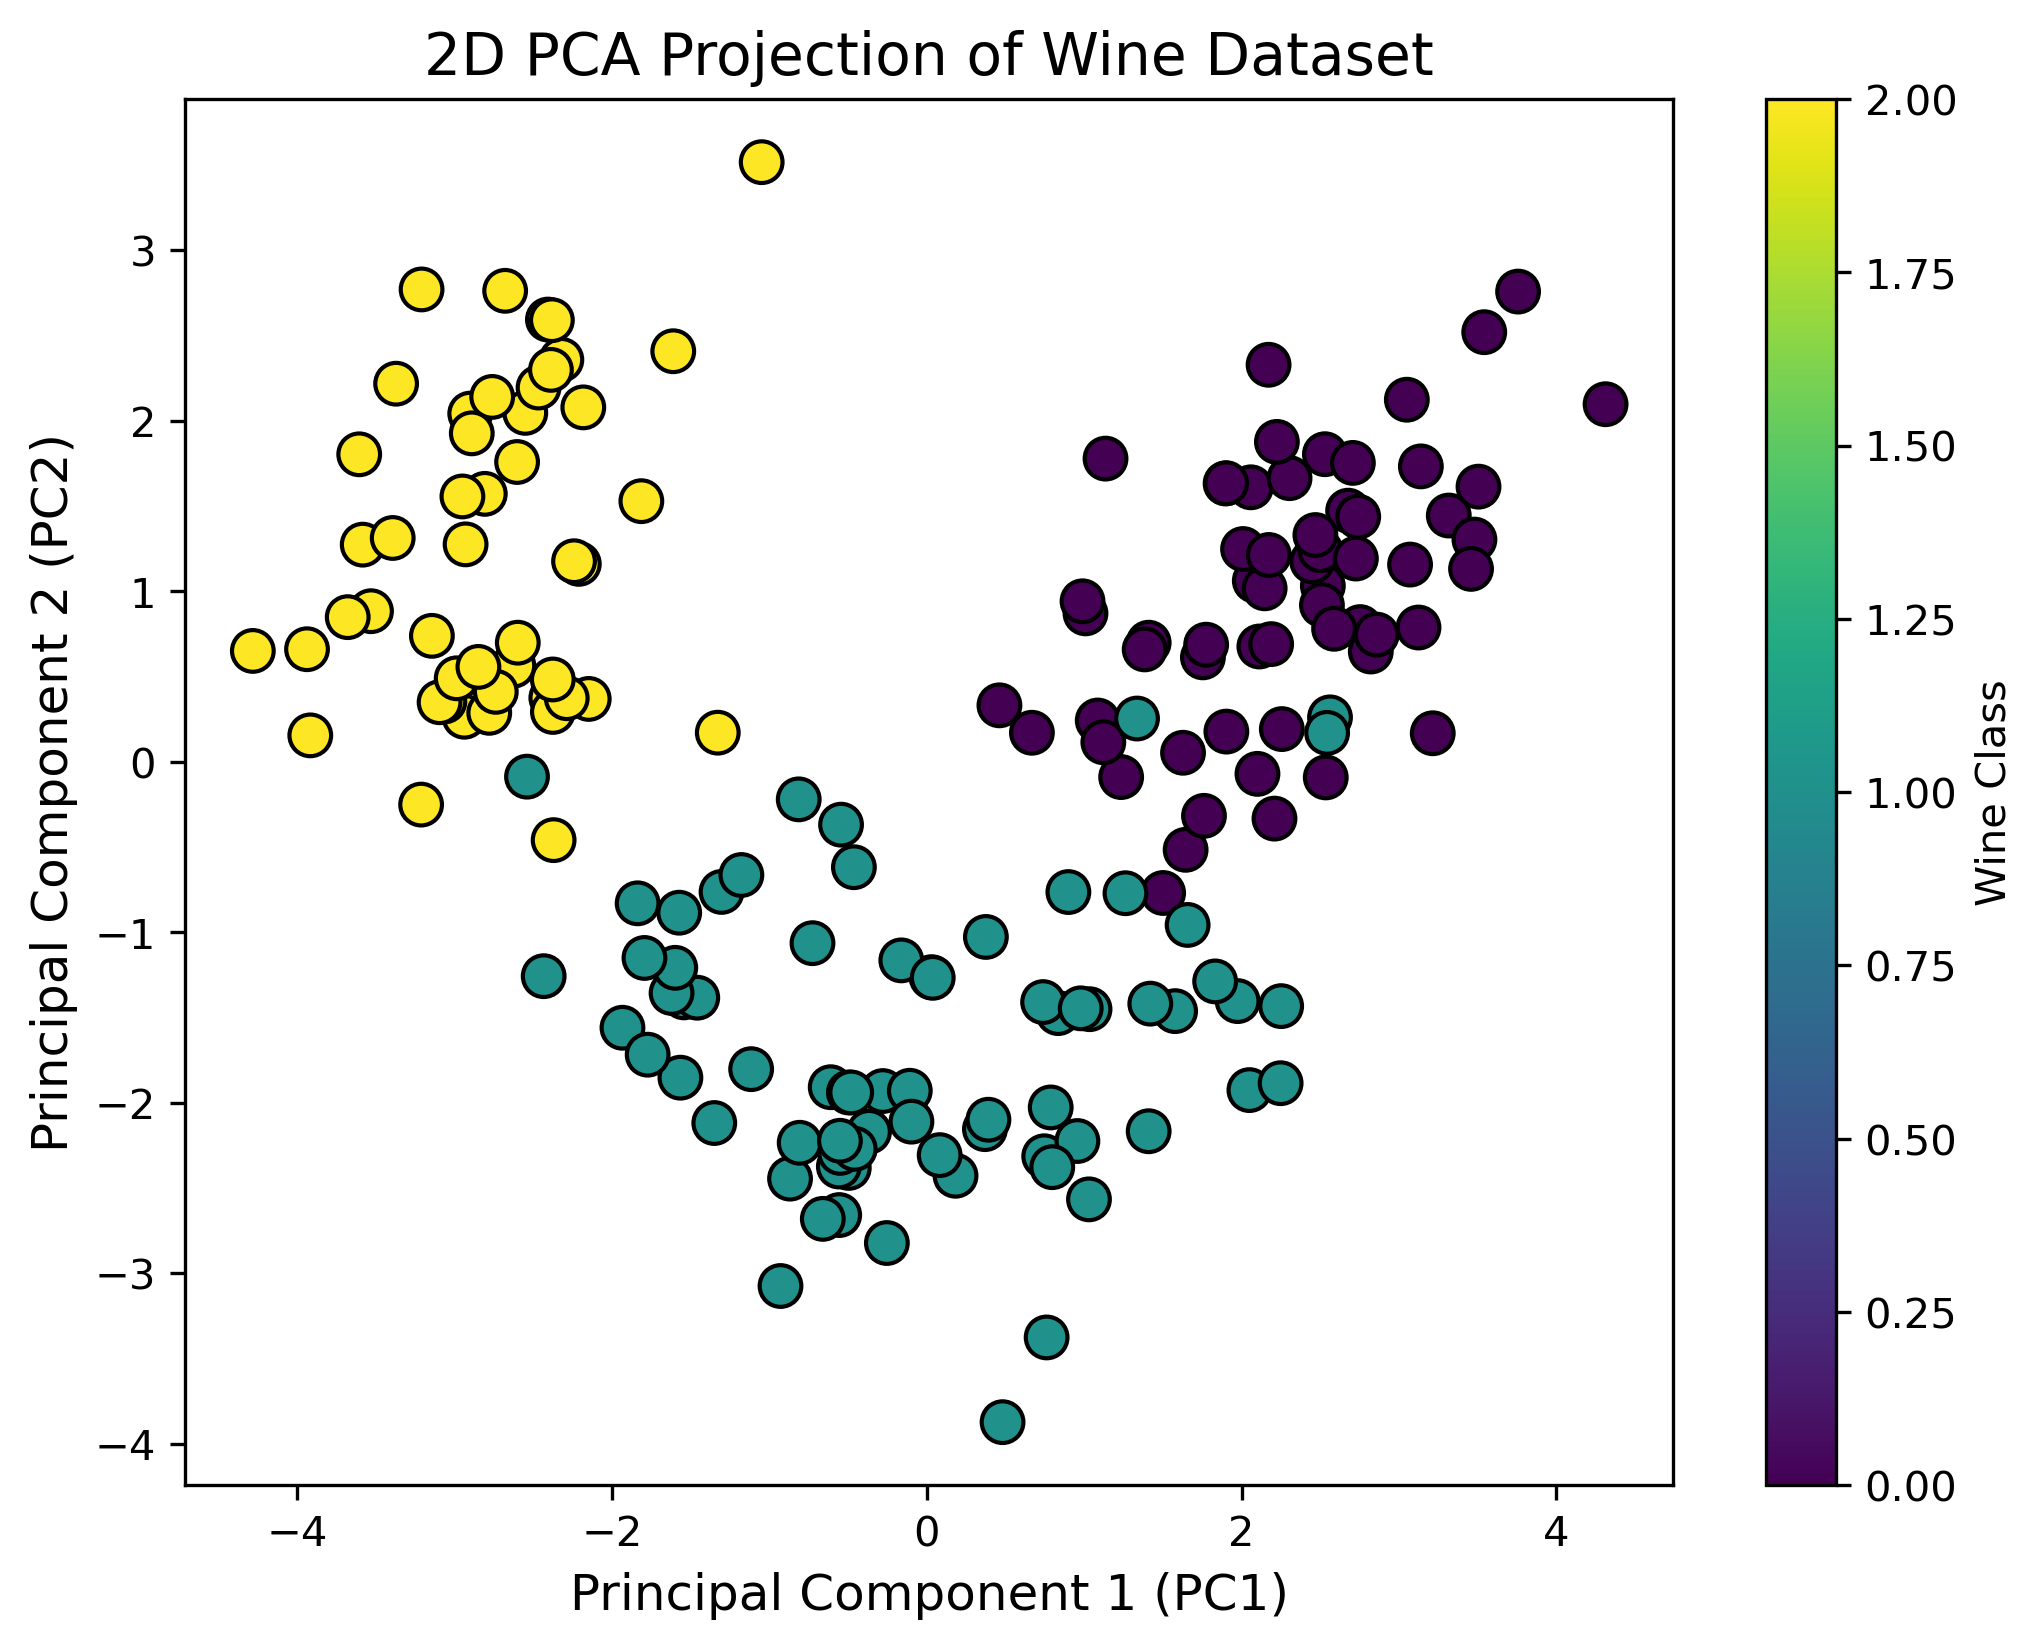

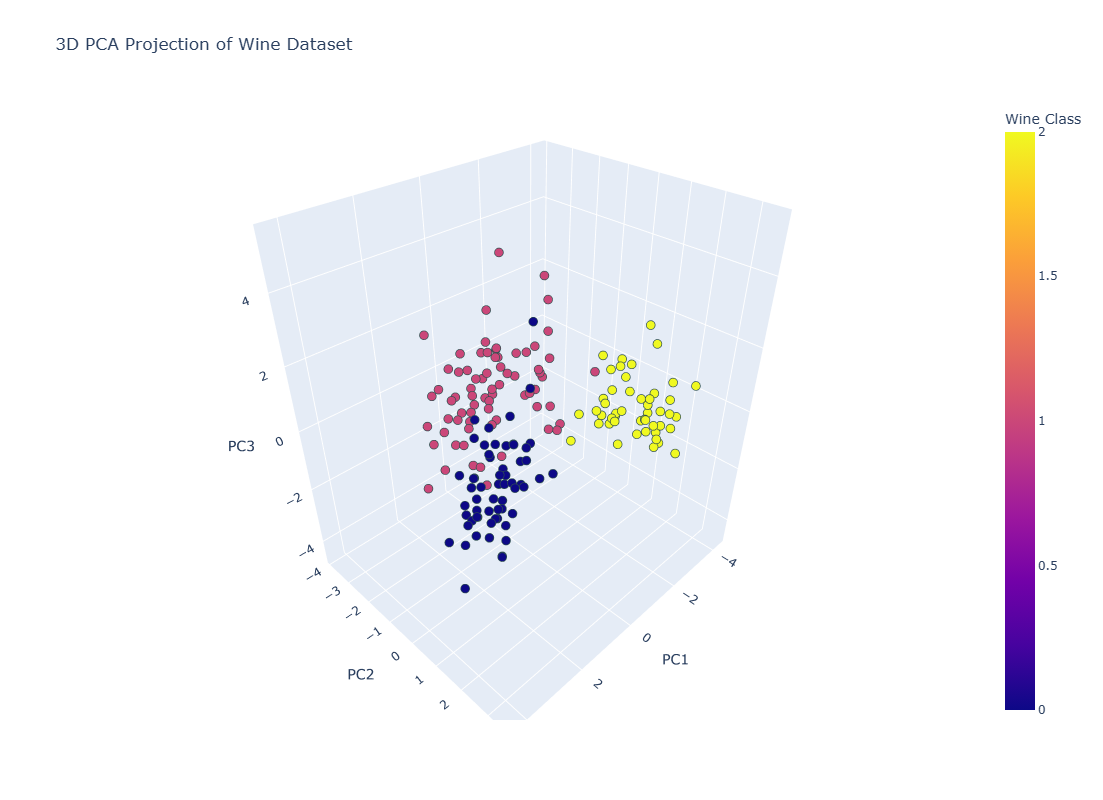

In [6]:
# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.express as px

# Step 2: Load the Wine Dataset
wine = load_wine()
X = wine.data  # Features (13-dimensional)
y = wine.target  # Labels (3 classes)
feature_names = wine.feature_names

# Step 3: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Perform PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Display the Proportion of Variance Captured by Each Principal Component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio for each Principal Component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

# Step 6: 2D Plot (First Two Principal Components) - High Resolution
plt.figure(figsize=(8, 6), dpi=300)  # Set DPI for high resolution
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.title('2D PCA Projection of Wine Dataset', fontsize=14)
plt.colorbar(label='Wine Class')
plt.savefig('pca_2d_plot.png', dpi=300, bbox_inches='tight')  # Save high-resolution image
plt.show()

# Step 7: 3D Plot (First Three Principal Components) - High Resolution
# Create a DataFrame for Plotly
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Wine Class'] = y

# Create a 3D scatter plot
fig = px.scatter_3d(
    df_pca, x='PC1', y='PC2', z='PC3', 
    color='Wine Class', 
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
    title='3D PCA Projection of Wine Dataset'
)
fig.update_traces(marker=dict(size=5, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(
    scene=dict(
        xaxis=dict(title='PC1', title_font=dict(size=14)),
        yaxis=dict(title='PC2', title_font=dict(size=14)),
        zaxis=dict(title='PC3', title_font=dict(size=14))
    ),
    width=800,  # Set width of the plot
    height=800  # Set height of the plot
)
fig.write_html('pca_3d_plot.html')  # Save as interactive HTML file
fig.show()